# Epoch 5: Computer Vision

## Imports and utility functions

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import keras
import os

def display_activation(activations, col_size, row_size, layer_number): 
  activation = activations[layer_number] 
  activation_index = 0
  
  if len(activation.shape) == 2:
    activation = activation.reshape(1, 1, activation.shape[-1])
    plt.imshow(activation[0], cmap='gray')
    plt.gcf().set_size_inches(21, 14)
    return

  fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*5,col_size*5))
  for row in range(0, row_size):
    for col in range(0, col_size):
      
      try:
        ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
        activation_index += 1
      except IndexError as e:
        pass

# Image Classification: MNIST

Image processing is different from the usual classical feed-forward methods we've seen in the past. The way it differs is that images have information that displays **traslational variance**. Feed forward networks do not take this into account, so we need to adjust our algorithm to fit this type of data. 


![](https://cdn-images-1.medium.com/max/1600/0*JLEJUX1xVlsz5Yfg)

We can achieve this using **convolutional neural networks**. 


![](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/Images/Conv2dUsage1.png)

Convolutions, in the case of image processing, consist of smaller images that slide over the input image, and the result is a modified version of the input. 


![](https://upload.wikimedia.org/wikipedia/commons/4/4f/3D_Convolution_Animation.gif)


A convolutional neural network is a collection of such "smaller images", organized in a hierarchical manner. 


![](https://ujwlkarn.files.wordpress.com/2016/08/conv_all.png?w=748)

Usually, the output layers are feed-forward layers, that are used to classify the feature maps. Actually, we can put any classifier there (a SVM / RandomForest etc), and it will work just as fine. The reason we use feed-forward layers is that the network can be trained end to end using backpropagation.

![](https://developer.nvidia.com/sites/default/files/pictures/2018/convolutional_neural_network.png)


Take a look at this video to understand more of how a neural network handles images:

- https://www.youtube.com/watch?v=BFdMrDOx_CM


## MNIST

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


![](https://cdn-images-1.medium.com/max/1600/1*_RLj3E4Lt8cZzlwtmcbqlA.png)

In [0]:

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Add more convolutional, pooling, and dense layers

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                173088    
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(x_train, y_train,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 39s 650us/step - loss: 0.5595 - acc: 0.8147 - val_loss: 0.1091 - val_acc: 0.9689
Test loss: 0.10908324933722616
Test accuracy: 0.9689


Over 95% accuracy with only a few layers. Let's see the feature maps.

Text(0.5, 1.0, '5')

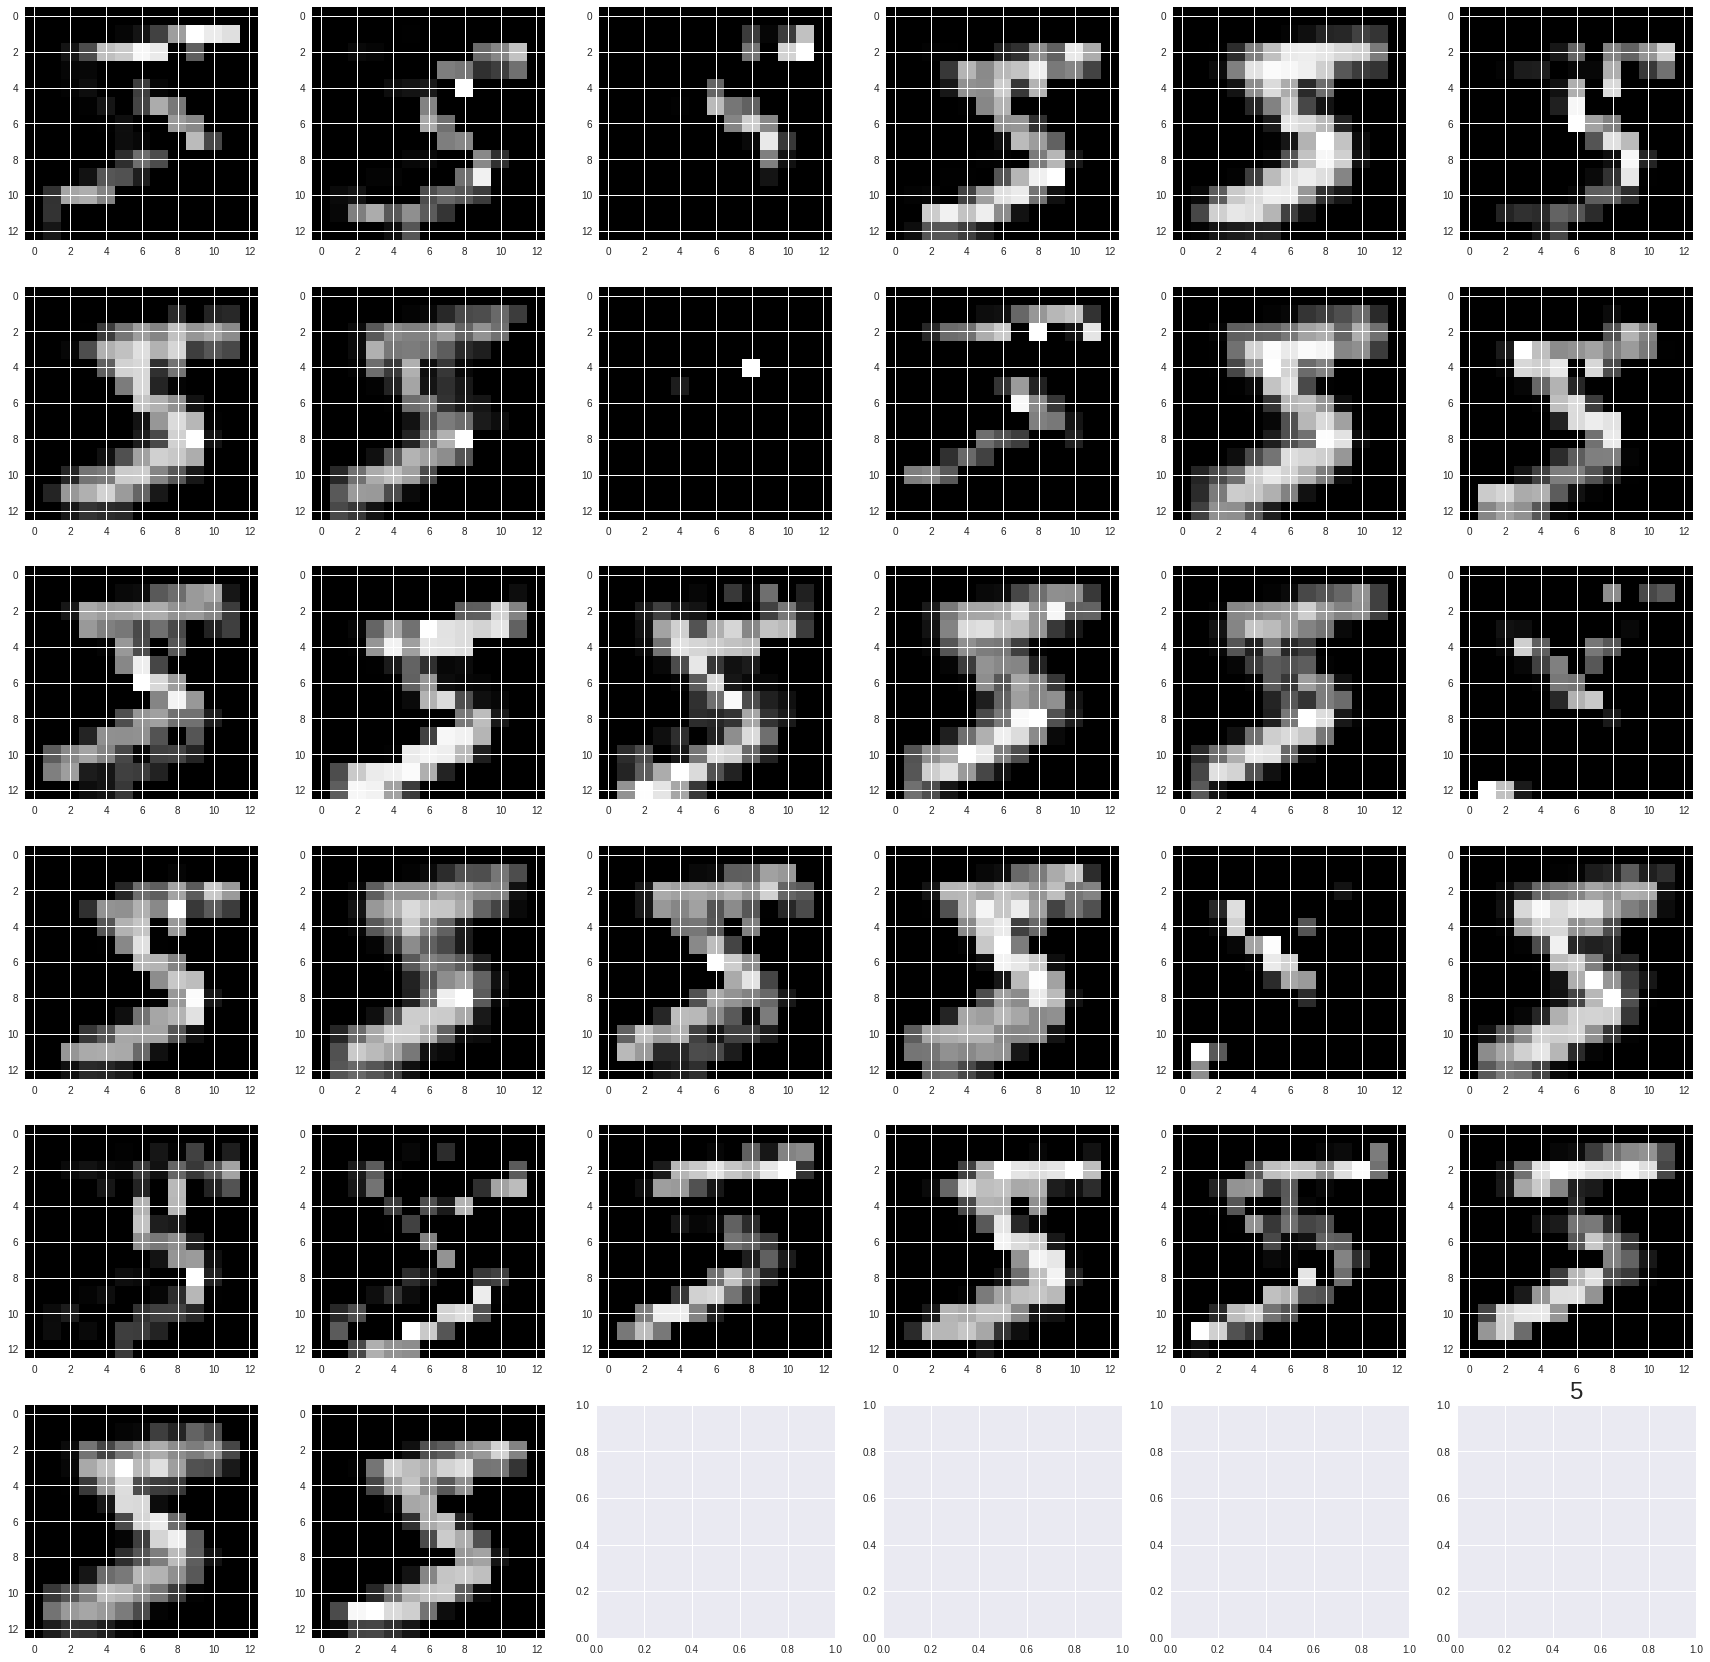

In [0]:
image_index = 0

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_train[image_index].reshape(1, 28, 28, 1))

display_activation(activations, 6, 6, 1)
plt.title(y_train[image_index], fontsize=24)

# Image Classification: CIFAR-10 

Convolution Neural Networks are very suited for images. A convolution acts as a pattern recognition. It looks only in a small region of pixels (3x3 or 5x5). The layers now are no longer fully connected, but a neuron is connected only with a few neurons.

Take a look at these useful links:
* https://medium.com/@eternalzer0dayx/demystifying-convolutional-neural-networks-ca17bdc75559
​
* http://cs231n.github.io/convolutional-networks/
​
* https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

![](https://shafeentejani.github.io/assets/images/convolutional_neural_network.png)

In [0]:

(x_train, y_train),(x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

We'll use [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset for classification. It has 10 classes of various objects. They are 32x32 colored images. Let's take a look at the first 5:

In [0]:
class_names = [
  'airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'
]

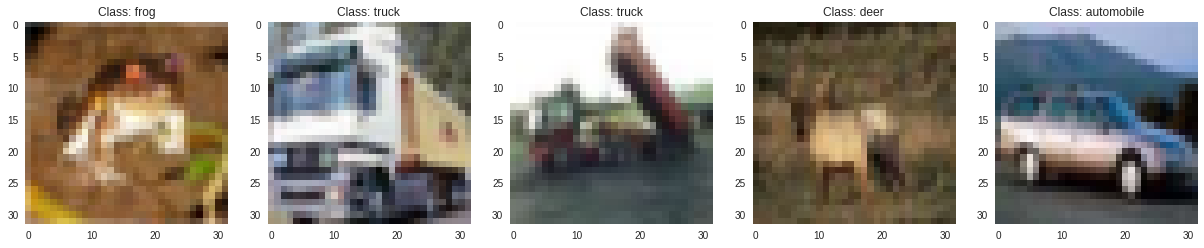

In [0]:
fig, ax = plt.subplots(1, 5)

for i in range(5):
  ax[i].imshow(x_train[i])
  ax[i].set_title("Class: " + str(class_names[y_train[i][0]]))
  ax[i].grid(False)
fig.set_size_inches(21, 14)

We will use the [keras 2D Convolution layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [pooling layers](https://keras.io/layers/pooling/) to reduce the image size and make the network faster and less prone to overfitting.

In [0]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape = (32, 32, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 13, 13, 16)        4624      
_________________________________________________________________
flatten_20 (Flatten)         (None, 2704)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 2704)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                86560     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                330       
Total para

In [0]:
normalized_x_train = x_train / 255
normalized_x_test = x_test / 255

model.fit(normalized_x_train, y_train, epochs=5, validation_data=(normalized_x_test, y_test), batch_size=128)

Train on 5000 samples, validate on 1000 samples
Epoch 1/5
5000/5000 [==============================] - 9s 2ms/step - loss: 2.2706 - acc: 0.1140 - val_loss: 2.1613 - val_acc: 0.2500
Epoch 2/5
5000/5000 [==============================] - 6s 1ms/step - loss: 2.0471 - acc: 0.2464 - val_loss: 1.9366 - val_acc: 0.3240
Epoch 3/5
5000/5000 [==============================] - 6s 1ms/step - loss: 1.8961 - acc: 0.3094 - val_loss: 1.8486 - val_acc: 0.3600
Epoch 4/5
5000/5000 [==============================] - 6s 1ms/step - loss: 1.7928 - acc: 0.3532 - val_loss: 1.7480 - val_acc: 0.3910
Epoch 5/5
5000/5000 [==============================] - 6s 1ms/step - loss: 1.7049 - acc: 0.3838 - val_loss: 1.6834 - val_acc: 0.3940


## Visualising the filters

Remember that each layer of a convolutional network consists of a set of **filters** (i.e. small images) that are learned. We can actually visualize them to gain some intuition about how the model learns.

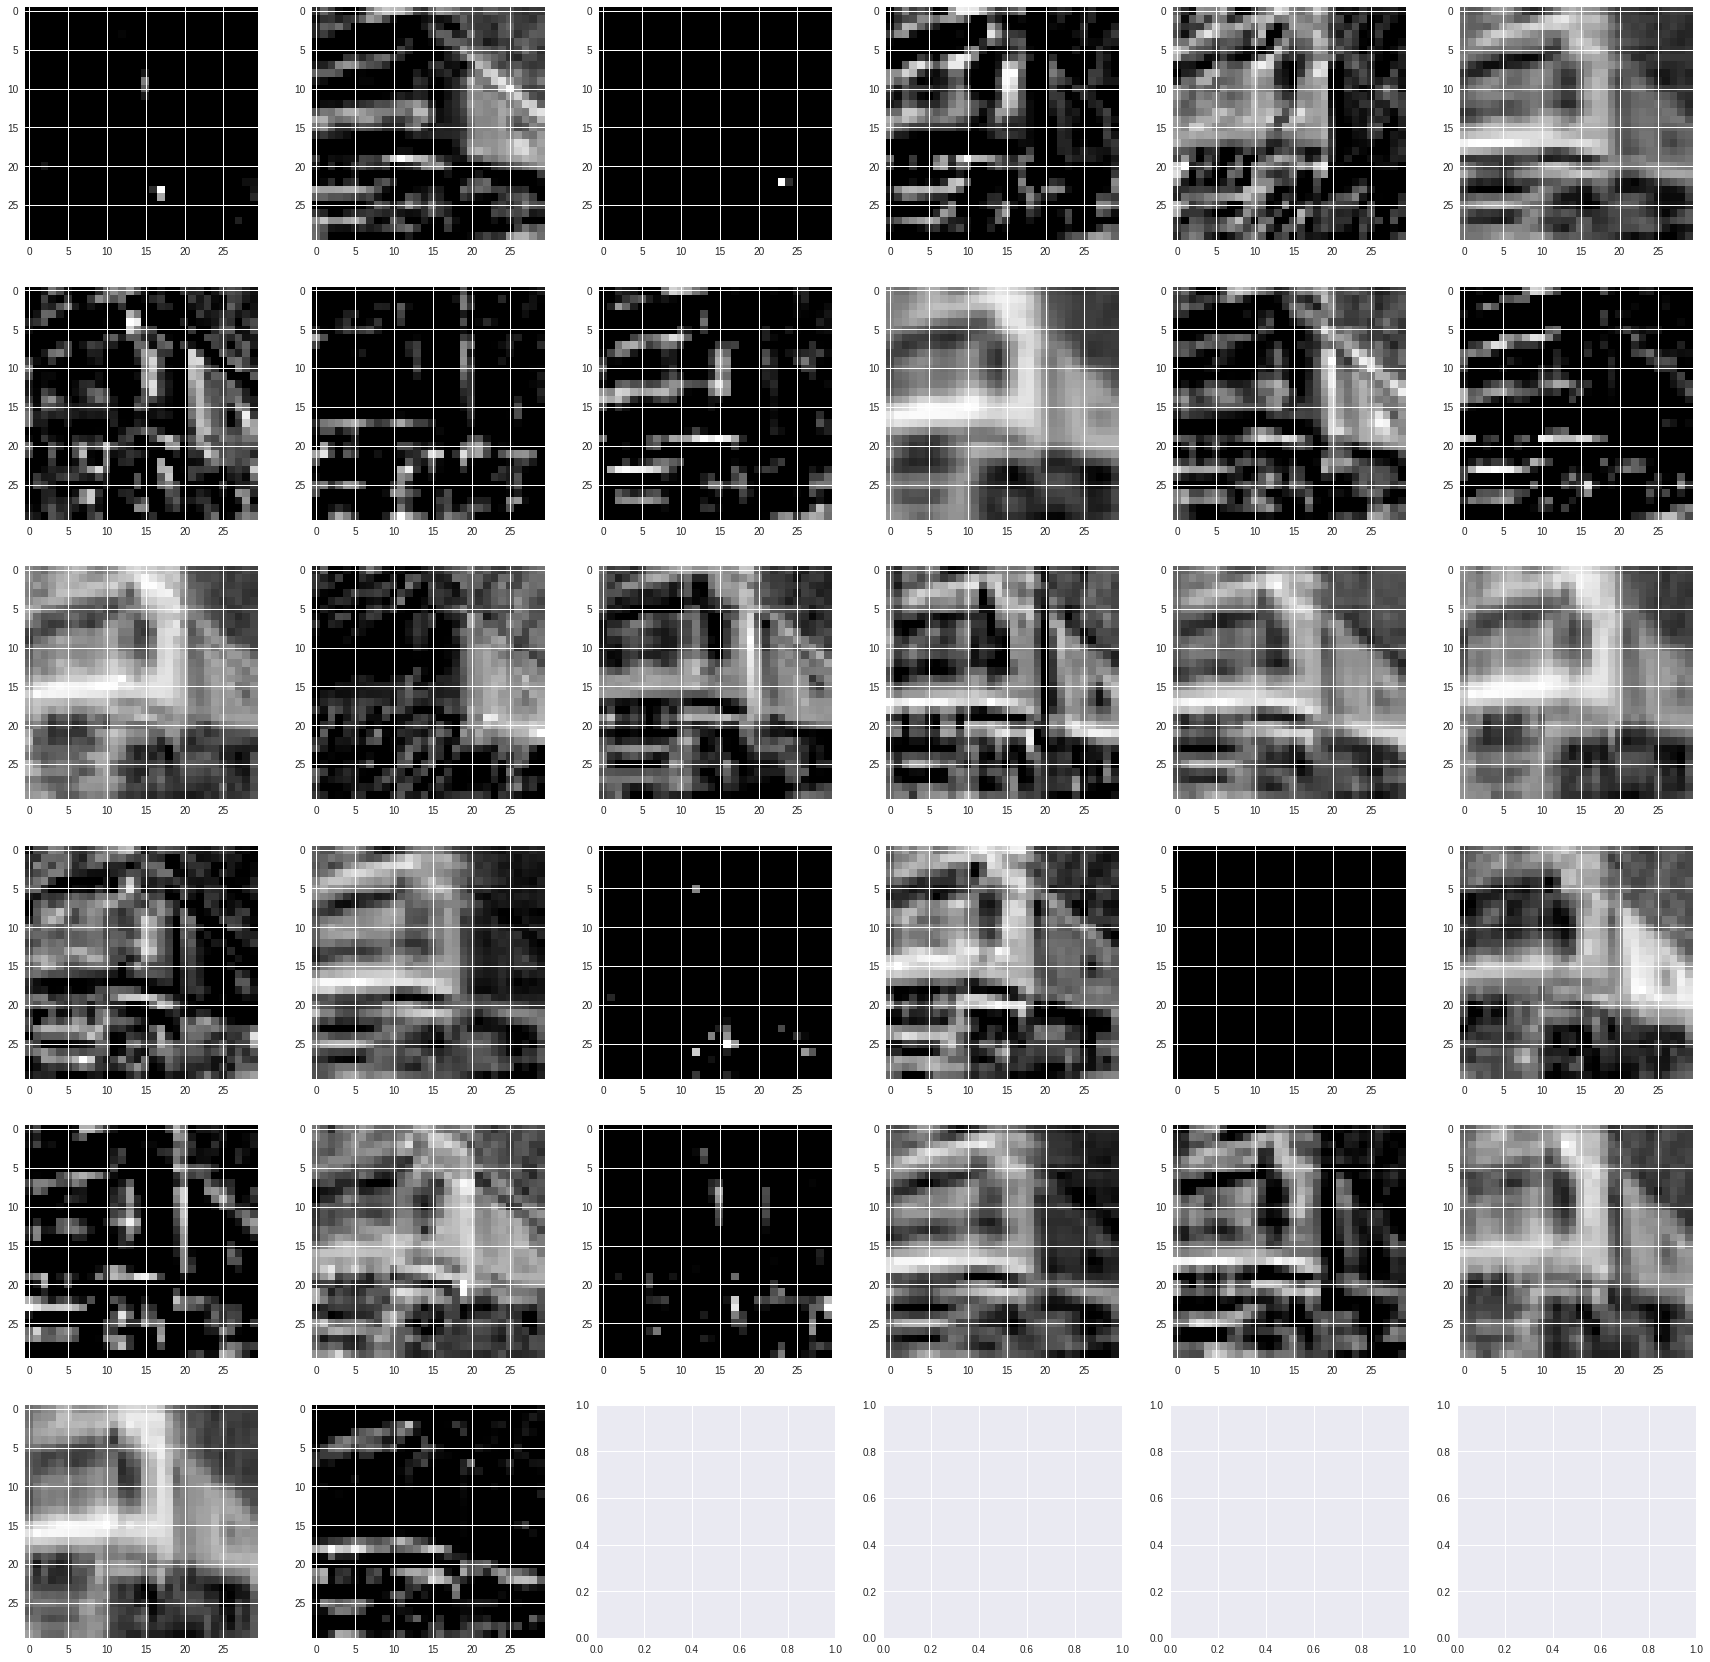

In [0]:

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(normalized_x_train[1].reshape(1, 32, 32, 3))

display_activation(activations, 6, 6, 0)

We can use the visualization to ensure that our model learned correctly. If we see purely noise, especially in the first layer, it's a sure sign the model hasn't learned properly. On the other hand, if we see filters that are black, it means that they are redundant, and can be eliminated to make the model smaller (faster) but with the same accuracy.

# The Autoencoder 

The autoencoder works a bit differently than a normal convolutional network. The main difference is that a "bottleneck" is present, and that the "labels" are actual images instead of classes. We can use an autoencoder for denoising images.

Check these links to learn more:

- https://www.jeremyjordan.me/autoencoders/

- https://www.youtube.com/watch?v=Rdpbnd0pCiI

Check out this survey to learn more about the Deep Learning evolution, in general:

- https://arxiv.org/pdf/1404.7828.pdf

![](https://www.jeremyjordan.me/content/images/2018/03/Screen-Shot-2018-03-06-at-3.17.13-PM.png)

In [0]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

x_train = x_train[:1000]
x_test = x_test[:1000]

noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

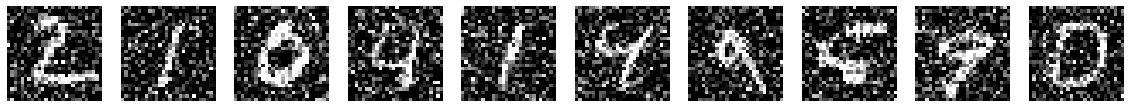

In [0]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

![](https://www.jeremyjordan.me/content/images/2018/03/Screen-Shot-2018-03-09-at-10.20.44-AM.png)

In [0]:
model = keras.models.Sequential()

# encoder
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.AveragePooling2D((2, 2), padding='same'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.AveragePooling2D((2, 2), padding='same'))


# decoder

model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.UpSampling2D((2, 2)))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.UpSampling2D((2, 2)))

# output - 1 channel for gray images
model.add(keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
         

model.compile(optimizer='adam', loss='binary_crossentropy')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_14 (UpSampling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 14, 14, 32)        9248      
__________

Our autoencoder makes use of Upsampling2D layer, which is a "deconvolution". Instead of making the input smaller, it make it larger. Basically it works as a normal image resize and then a normal convolution operation.

![](https://i.stack.imgur.com/YyCu2.gif)


In [0]:
model.fit(x_train_noisy, x_train, epochs=1, batch_size=1, validation_data=(x_test_noisy, x_test))

Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1501 - val_loss: 0.1077


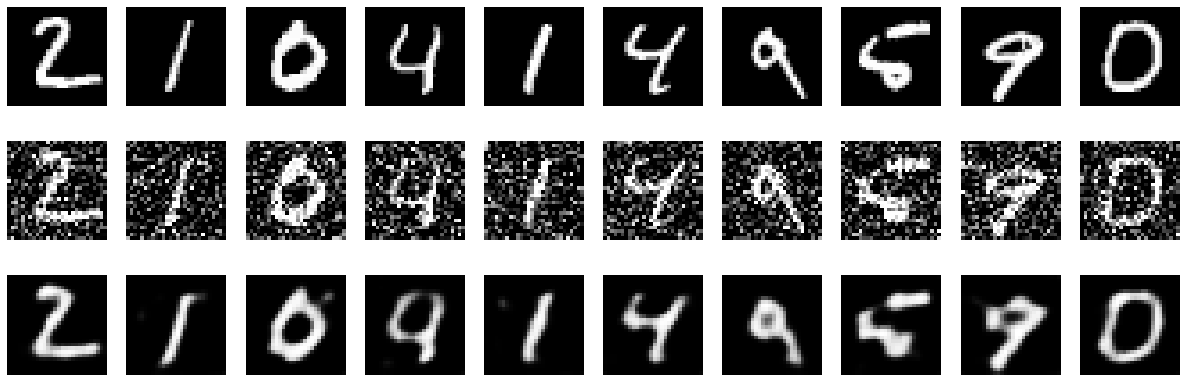

In [0]:
decoded_imgs = model.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.gcf().set_size_inches(21, 7)    
plt.show()

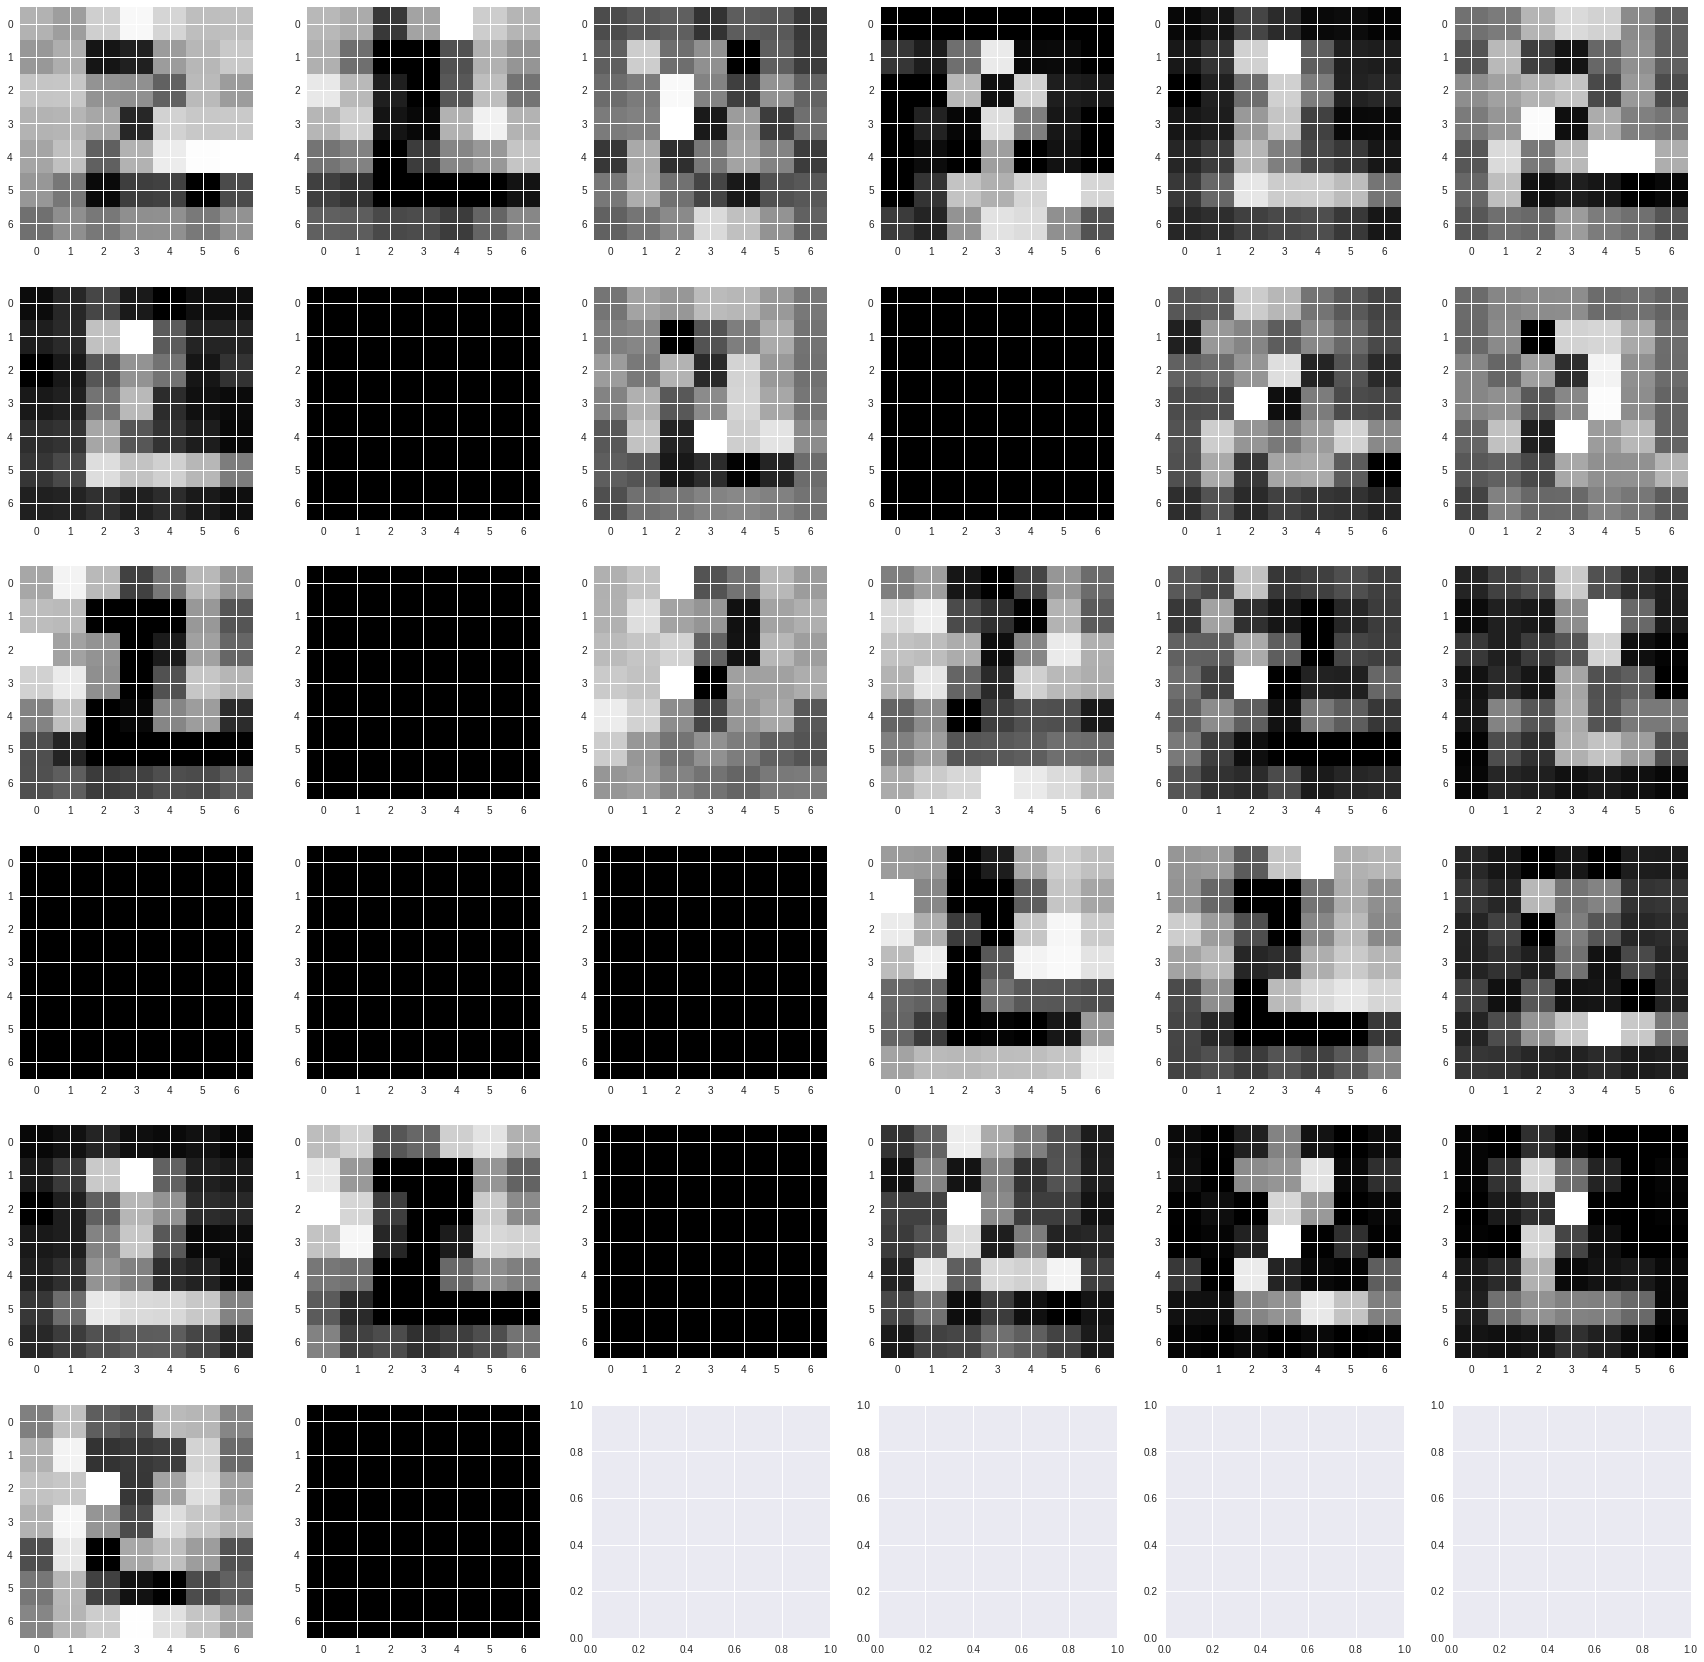

In [0]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_test_noisy[1].reshape(1, 28, 28, 1))

# let's see what the latent vector looks like for a noisy "2"
display_activation(activations, 6, 6, 3)